# Regression From Scratch
The goal of this project will be to implement linear and multiple linear regression models from scratch.

# Initializing and Visualizing

Let's start by loading the data and looking into it to see if we can derive any insights:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

house_data=pd.read_csv('Real estate.csv')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


It doesn't look like there are any missing values

In [ ]:
house_data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


There aren't any out of place values, it seems.

In [ ]:
house_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


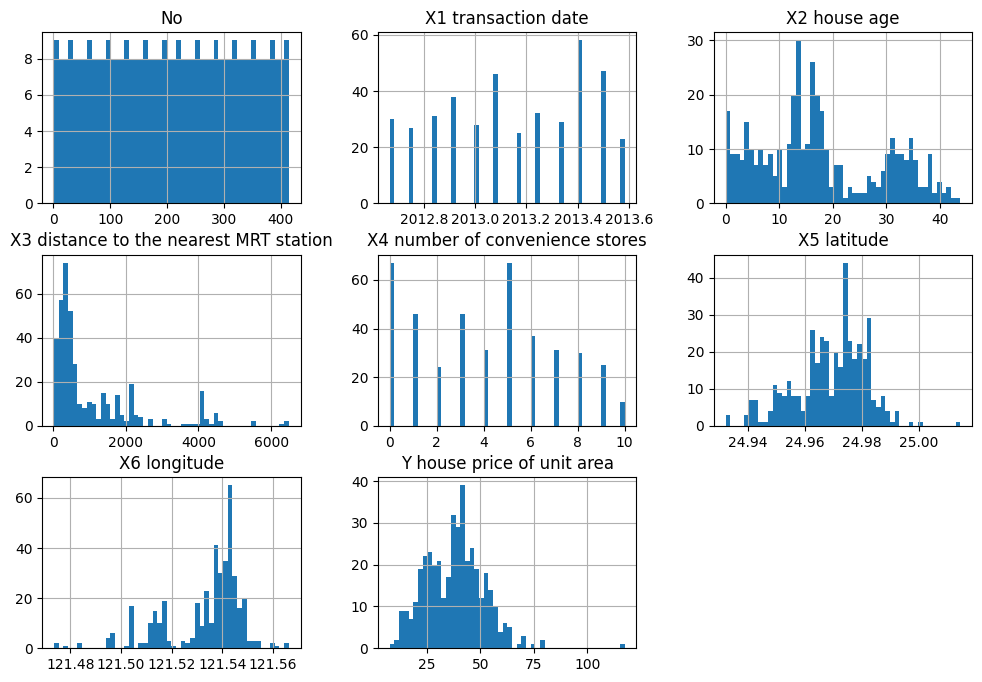

In [ ]:
house_data.hist(bins = 50, figsize = (12,8))
plt.show()

Let us plot some correlations to see if there are any important features (though, since there are only a few, we will probably use all of them for multiple regression):


In [ ]:
correlations = house_data.corr()
correlations['Y house price of unit area'].sort_values(ascending=False)

,Y house price of unit area
Y house price of unit area,1.000000
X4 number of convenience stores,0.571005
X5 latitude,0.546307
X6 longitude,0.523287
X1 transaction date,0.087491
No,-0.028587
X2 house age,-0.210567
X3 distance to the nearest MRT station,-0.673613


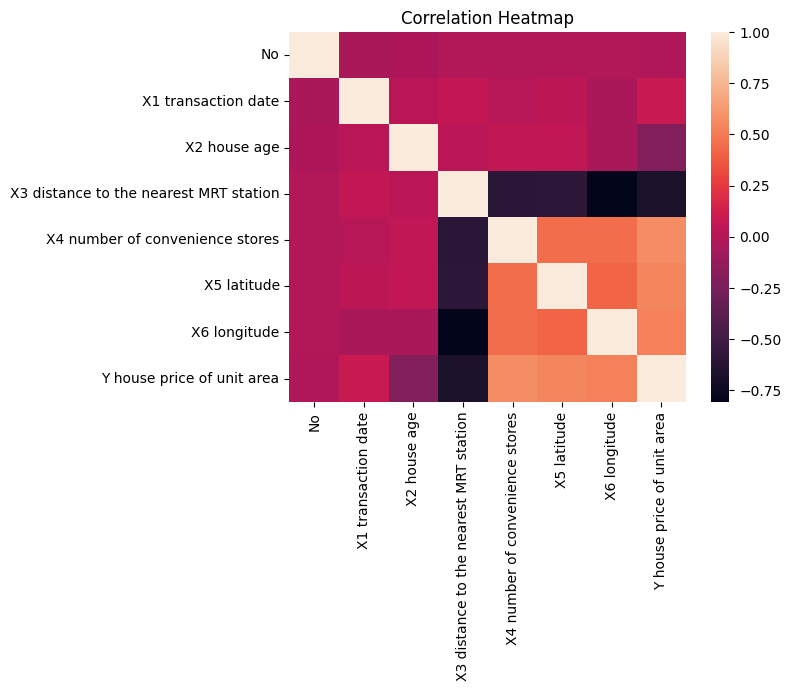

In [ ]:
sns.heatmap(correlations)
plt.title('Correlation Heatmap')
plt.show()

# Data Cleaning
Normally, we would clean the data after a brief analysis however, this dataset seems to have already been cleaned.

Let's drop the 'No' column as it seems like an extraneous index with no value to our model:

In [ ]:
house_data.drop('No', axis=1, inplace=True)
house_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Linear Regression Model

Let us start by implementing a linear regression model using one of the features. The feature with the highest positive correlation was the number of convenience stores, so let us use that for this single feature model:

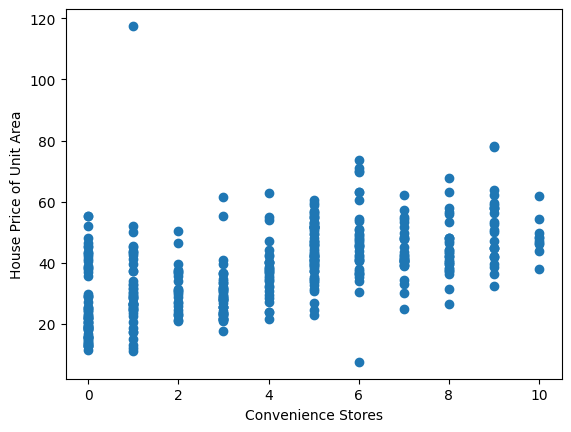

In [ ]:
x = house_data['X4 number of convenience stores']
y = house_data['Y house price of unit area']

plt.scatter(x,y)
plt.xlabel('Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.show()

Obviously, this doesn't look good and our linear regression model will have a big error coefficient, however let us proceed and compare the different models once we have finished them all. We will calculate the regression model using gradient descent:

In [ ]:
def gradient_descent(m, b, points, learning_rate):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i]['X4 number of convenience stores']
    y = points.iloc[i]['Y house price of unit area']

    m_gradient += -(2/n) * x * (y - (m * x + b))
    b_gradient += -(2/n) * (y - (m * x + b))

    m = m - m_gradient * learning_rate
    b = b - b_gradient * learning_rate

  return m, b

Now that we have our gradient descent function, let us use it:

In [ ]:
m = 0
b = 0
learning_rate = 0.0001
epochs = 1000

for i in range(epochs):

  m, b = gradient_descent(m, b, house_data, learning_rate)

print(m, b)

y_hat=[]
for i in range(len(x)):
  y_hat.append(m*x[i]+b)

2.742741921187388 26.869995843481405


Let ud see how this line fits in with the convenience store data:

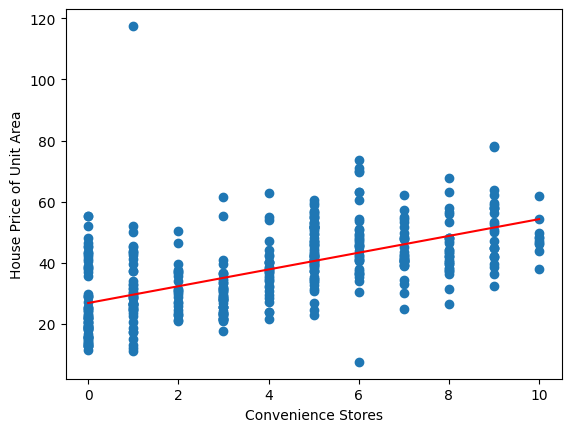

In [ ]:
plt.scatter(x,y)
plt.plot([min(x), max(x)], [min(m*x + b), max(m*x + b)], color='red')
plt.xlabel('Convenience Stores')
plt.ylabel('House Price of Unit Area')

plt.show()


In [ ]:
from sklearn.metrics import r2_score

def scratch_r2(y, y_hat):
  sst=0
  sse=0
  for i in range(len(y)):
    sst+=(y[i]-np.mean(y))**2
    sse+=(y[i]-y_hat[i])**2
  return 1-(sse/sst)

error=r2_score(y, y_hat) # Compare our algorithm to the one built in sklearn
custom_error=scratch_r2(y, y_hat)
print(f'SKLearn R^2 Error: {error}')
print(f'Scratch R^2 Error: {custom_error}')


SKLearn R^2 Error: 0.32545219513136026
Scratch R^2 Error: 0.3254521951313607


Clearly, the model won't work well and even though the line takes the slope of the general trend in the data, we are still off by a lot working with only one feature. Lets implement a multiple linear regression model so we have more features to work with.

# Multiple Linear Regression Model

Normally, it wouldn't be wise to use every single feature available for a model however, we only have a few to work with and a limited number of data points so in our case, it would probably be best to use them all. Let us implement another model from scratch to see how much we can improve upon our predictions:

In [ ]:
from sklearn.model_selection import train_test_split

x = house_data.drop('Y house price of unit area', axis=1)
y = house_data['Y house price of unit area']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

Since we are working with multiple featueres, it would be much faster to perform gradient descent using matrices, as such we can combine the gradient descent and regression model into the same function:

In [ ]:
def multiple_linreg(x, y, learning_rate, epochs):
  m = y.size
  x = x.to_numpy() if isinstance(x, pd.DataFrame) else x
  y = y.to_numpy().reshape(-1, 1) if isinstance(y, pd.Series) else y.reshape(-1, 1)

  weight_vector = np.zeros((x.shape[1], 1))
  for i in range(epochs):
    y_hat = np.dot(x, weight_vector)
    derivative =  (1/m) * np.dot(x.T, (y_hat - y))
    weight_vector = weight_vector - learning_rate * derivative
  return weight_vector

  '''In a gradient descent formula, 'weight vector' is theta and 'derivative
  is the derivative of theta however, I renamed them for clarity'''

def predict(x, weights):
  return np.dot(x, weights)

weights = multiple_linreg(x_train, y_train, 0.0000001, 10000000)
print(f'Weights: {weights}')

Weights: [[ 0.02356229]
 [-0.27475372]
 [-0.00567232]
 [ 1.17149514]
 [ 0.01790367]
 [-0.03127376]]


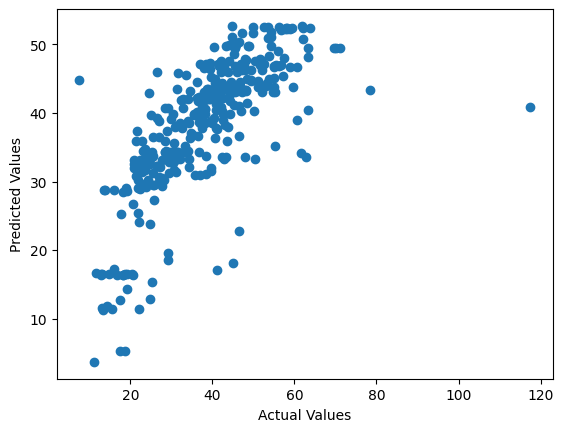

In [ ]:
y_hat = []
for i in range(len(x_train)):
  y_hat.append(predict(x_train.iloc[i], weights))

y_hat = np.array(y_hat)
y_train = np.array(y_train)

plt.scatter(y_train, y_hat)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
error = r2_score(y_train, y_hat)
custom_error = scratch_r2(y_train, y_hat)
print(f'SKLearn R^2 Error: {error:.8f}')
print(f'Scratch R^2 Error: {custom_error}')

SKLearn R^2 Error: 0.52517678
Scratch R^2 Error: [0.52517678]


Much better than the single feature model, around 50% more accurate however it stil seems to underfit the data. Let us try on the test set.

In [ ]:
y_hat = []
for i in range(len(x_test)):
  y_hat.append(predict(x_test.iloc[i], weights))

y_hat = np.array(y_hat)
y_test = np.array(y_test)

error = r2_score(y_test, y_hat)
custom_error = scratch_r2(y_test, y_hat)
print(f'SKLearn R^2 Error: {error:.8f}')
print(f'Scratch R^2 Error: {custom_error}')

SKLearn R^2 Error: 0.60998326
Scratch R^2 Error: [0.60998326]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

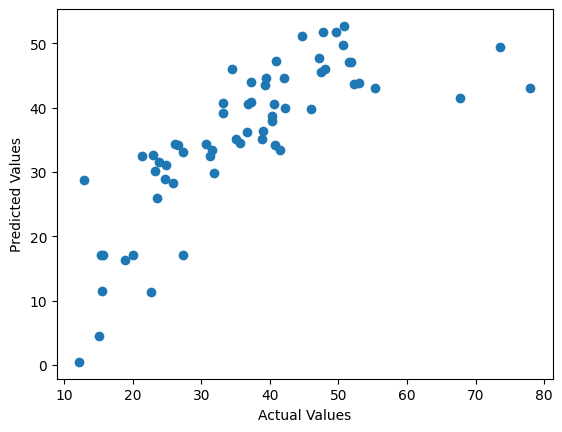

In [ ]:
plt.scatter(y_test, y_hat)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt

Again, underfit, but it seems like this is about as good as we'll get considering we can't put in more test/training examples (dataset size is only 414). Visually however, the test prediction seems to be taking (very) roughly the same shape as the training set. Let us now move onto polynomial regression to see the improvements we can make there.

## Notes About This Model:
Since we used matrix multiplication to find the weights, we likely did not need to create a test set for validation as we don't have enough points to reach a conclusive evaluation of our model anyways. Instead we might have been able to use the test points to better fit the model. I threw the evaluation in anyways for the sake of the project and to demonstrate how to fit the model with test data.

# Comparison With SKLearn Model

Now that we have our regression models, let us compare them with the built in algorithms in scikit-learn. We will be using the whole dataset to train, as per the notes in the multiple linear regression section.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_hat = model.predict(x_train)

error = r2_score(y_train, y_hat)
print(error)

0.5707778090745412


The models are comparible, the SKLearn model is roughly 10% more accurate.